In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator

**Exploratory Data Analysis**

In [2]:
df = pd.read_csv('../input/telecom-users-dataset/telecom_users.csv')
df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [3]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
# conversions
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # has some string values, force them to NaN
df.SeniorCitizen = df.SeniorCitizen.astype('object')

# drop columns
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)

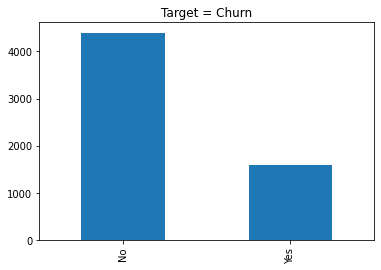

In [6]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Target = Churn')
plt.show()

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [8]:
# numerical features
num_features = ['tenure','MonthlyCharges','TotalCharges']

df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
# categorical features
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling','PaymentMethod']

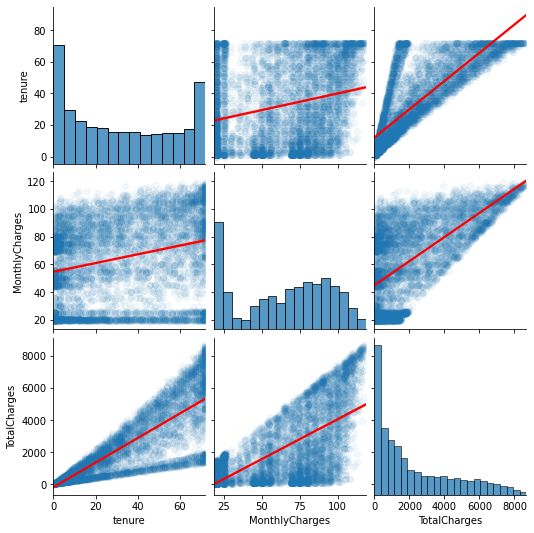

In [10]:
# acatter plots and histograms for numerical features
sns.pairplot(df[num_features], 
             kind='reg', 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.05}})
plt.show()

In [11]:
ch = {'Yes': 1., 'No': 0.}
df['Churn'] = df['Churn'].map(ch)

Text(0, 0.5, 'MonthlyCharges')

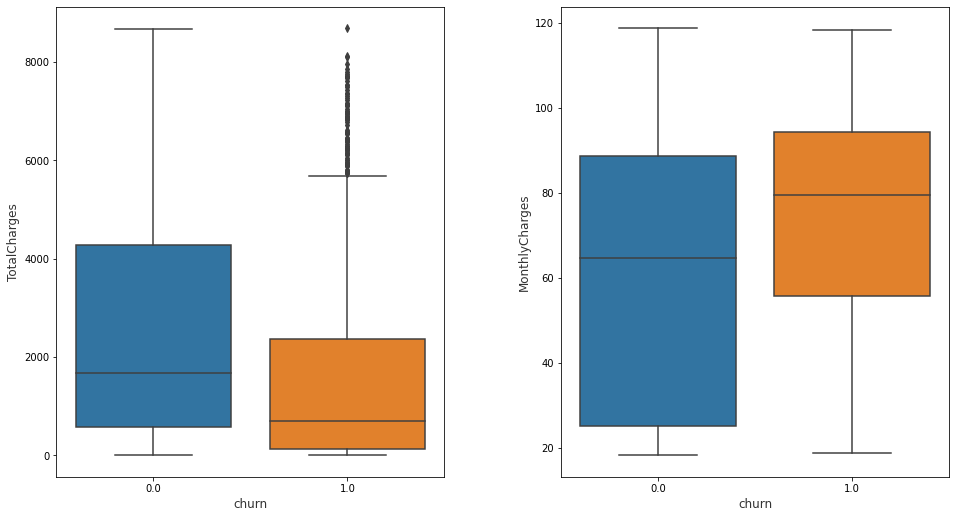

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=ax1)
ax1.set_xlabel("churn",size = 12,alpha=0.8)
ax1.set_ylabel("TotalCharges",size = 12,alpha=0.8)

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=ax2)
ax2.set_xlabel("churn",size = 12,alpha=0.8)
ax2.set_ylabel("MonthlyCharges",size = 12,alpha=0.8)

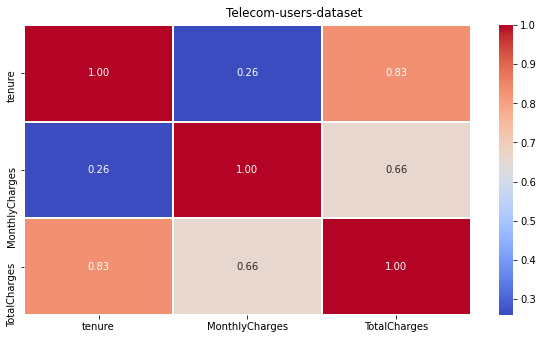

In [13]:
f, ax = plt.subplots(figsize=(10, 5))
corr = df.drop(['Churn'], axis=1).corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Telecom-users-dataset', fontsize=12)

**Data preparation**

In [14]:
df=df.replace('Male', 1)
df=df.replace('Female', 0)
df=df.replace('Yes', 1)
df=df.replace('No', 0)
df=df.replace('No internet service', 0)
df=df.replace('No phone service', 0)
df=df.replace('Fiber optic', 2)
df=df.replace('DSL', 1)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0.0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.20,0.0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1.0
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.50,0.0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.50,0.0


In [16]:
df1=pd.get_dummies(data=df, columns=['Contract','PaymentMethod'], drop_first=True)

In [17]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,1,0,0,0,...,0,0,24.10,1734.65,0.0,0,1,1,0,0
1,0,0,0,0,44,1,0,2,0,1,...,0,1,88.15,3973.20,0.0,0,0,1,0,0
2,0,1,1,0,38,1,1,2,0,0,...,0,1,74.95,2869.85,1.0,0,0,0,0,0
3,1,0,0,0,4,1,0,1,0,0,...,1,1,55.90,238.50,0.0,0,0,0,1,0
4,1,0,0,0,2,1,0,1,1,0,...,0,0,53.45,119.50,0.0,0,0,0,1,0


**Model**

In [35]:
h2o.init(max_mem_size='14G', nthreads=2) # Use maximum of 12 GB RAM and 4 cores

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,14 mins 17 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 20 days
H2O_cluster_name:,H2O_from_python_unknownUser_9lipwg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.99 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
# upload data frame in H2O environment
df_hex = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:
# train-test split
train, test = df_hex.split_frame(ratios=[0.7], seed=42)

In [38]:
# random forest classifier
model = H2ORandomForestEstimator(ntrees=100, max_depth=15,
                                 min_rows=5, nfolds=5,
                                 model_id='DRF_1', seed=42)

In [39]:
# model training
model.train(x=num_features + cat_features, y='Churn', training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [40]:
# cross-validation summary
model.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.26635426,0.004332983,0.2642385,0.27297324,0.26544017,0.26143438,0.26768506
1,mean_residual_deviance,0.135941,0.0034969535,0.135223,0.14071776,0.1351986,0.1311578,0.13740781
2,mse,0.135941,0.0034969535,0.135223,0.14071776,0.1351986,0.1311578,0.13740781
3,r2,0.29335344,0.036326475,0.2511974,0.30372745,0.3018955,0.34402907,0.2659178
4,residual_deviance,0.135941,0.0034969535,0.135223,0.14071776,0.1351986,0.1311578,0.13740781
5,rmse,0.36867735,0.004742689,0.3677268,0.37512365,0.3676936,0.36215714,0.3706856
6,rmsle,0.25885752,0.00464537,0.2604467,0.26159632,0.25869218,0.25096244,0.26259002


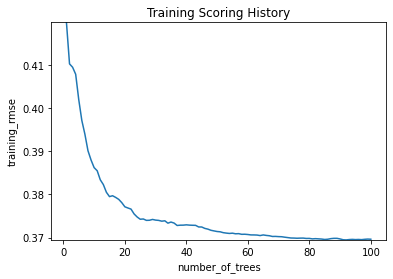

In [41]:
# ROC
performance = model.model_performance(test)
model.plot()